### Support Vector Classifier Task

#### 심장마비 가능성 예측


#### feature
- age: 환자의 나이  
- sex: 환자의 성별 (0 = female, 1 = male).  
- cp: 흉통성 (1 = typical angina(전형 협심증), 2 = atypical angina(비전형 협심증), 3 = non-anginal pain(비협심증), 4 = asymptomatic(무증상))  
- trestbps: 정지 혈압(mmHg)  
- chol: 혈청 콜레스테롤 수치(mg/dl)  
- fbs: 공복혈당 (> 120mg/dl) (1 = true, 0 = false)  
- restecg: 정지 심전도 결과 (0 = normal, 1 = having ST-T wave abnormality(ST-T파 이상), 2 = probable or definite left ventricular hypertrophy(좌심실 비대 가능성 또는 확실성))  
- thalach: 최대 심박수  
- exang: 운동 유발 협심증 (1 = yes, 0 = no)  
- oldpeak: 휴식과 관련된 운동으로 인한 ST 우울증  
- slope: 피크 운동 ST 세그먼트의 기울기  
- ca: 형광 투시법으로 채색된 주요 혈관의 수  
- thal: 탈라세미아(혈액장애의 일종) results (3 = normal, 6 = fixed defect(고정결함), 7 = reversible defect(가역결함))  

#### target
- output : 1 = 심장마비 존재, 0 = 심장마비 없음

In [74]:
import pandas as pd

# 데이터 세트 불러오기
heart_df = pd.read_csv('./datasets/heart.csv')

heart_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [75]:
# 데이터 세트 정보 확인
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [76]:
# 중복 행 검사
heart_df.duplicated().sum()

1

In [77]:
# 중복 제거 후 인덱스 초기화
heart_df.drop_duplicates(inplace=True)
heart_df.reset_index(drop=True, inplace=True)

heart_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [78]:
# 중복 여부 재확인
heart_df.duplicated().sum()

0

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# 각 숫자 컬럼들의 상관관계도 출력
corr = heart_df.corr()
corr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


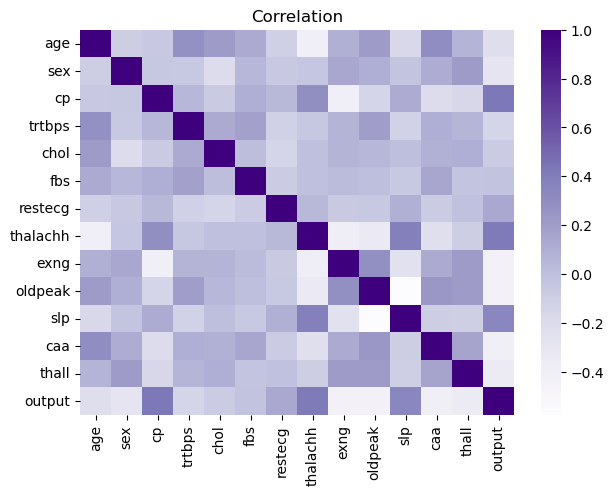

In [80]:
# 위의 상관관계도를 히트맵으로 시각화
fig = plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(corr, cmap='Purples')
heatmap.set_title('Correlation')
plt.show()

In [81]:
# target(output)에 대한 각 컬럼의 상관관계도를 내림차순으로 출력
corr[['output']].sort_values(by='output', ascending=False)[1:]

,output
cp,0.432080
thalachh,0.419955
slp,0.343940
restecg,0.134874
fbs,-0.026826
chol,-0.081437
trtbps,-0.146269
age,-0.221476
sex,-0.283609
thall,-0.343101


In [82]:
# output의 값 분포 출력
heart_df.output.value_counts()

output
1    164
0    138
Name: count, dtype: int64

In [83]:
# 언더 샘플링
op1 = heart_df[heart_df.output == 1].sample(138, random_state=124)
op0 = heart_df[heart_df.output == 0]

under_h_df = pd.concat([op1, op0]).reset_index(drop=True)

under_h_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
2,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
3,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
4,46,1,1,101,197,1,1,156,0,0.0,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
272,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
273,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
274,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [84]:
from sklearn.preprocessing import StandardScaler

# 언더 샘플링 된 세이터 세트에서 마지막 컬럼을 제외한 나머지(feature)를 가져옴
features = under_h_df.iloc[:, :-1]

# feature들의 값을 정규화
std = StandardScaler()
std_features = std.fit_transform(features)

# 정규화된 feature 값으로 이루어진 새로운 데이터프레임 생성 후
# 원래 데이터 세트(언더 샘플링 된 것)에 있던 output(target) 컬럼 가져와서 맨 마지막에 추가
std_under_h_df = pd.DataFrame(std_features, columns=features.columns)
std_under_h_df['output'] = under_h_df.output

# 만들어진 데이터프레임의 행, 열 개수 출력(276행 * 14열)
std_under_h_df.shape

(276, 14)

In [85]:
columns = ['thalachh', 'oldpeak', 'slp']

# 위의 컬럼들 안 값들 중, 정규화 했을 때 -1.96~1.96 범위를 벗어나는 게 몇 건인지를 출력
for column in columns:
    print(f'{column}: {std_under_h_df[~std_under_h_df[column].between(-1.96, 1.96)].shape[0]}건')

thalachh: 13건
oldpeak: 17건
slp: 20건


In [86]:
columns = ['thalachh', 'oldpeak', 'slp']

# 정규화된 데이터프레임에서 위 컬럼 내 이상치 제거
for column in columns:
    std_under_h_df.drop(
        std_under_h_df[~std_under_h_df[column].between(-1.96, 1.96)].index, 
        axis=0, 
        inplace=True)

# 위 컬럼 내 이상치 개수 재출력
for column in columns:
    print(f'{column}: {std_under_h_df[~std_under_h_df[column].between(-1.96, 1.96)].shape[0]}건')

thalachh: 0건
oldpeak: 0건
slp: 0건


In [87]:
# 언더 샘플링 된 데이터 세트에서 이상치 삭제
under_h_df = under_h_df.iloc[std_under_h_df.index].reset_index(drop=True)
under_h_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
2,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
3,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
4,46,1,1,101,197,1,1,156,0,0.0,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
233,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
234,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
235,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [88]:
# 이상치 제거 후 output의 분포 출력
under_h_df.output.value_counts()

output
1    128
0    109
Name: count, dtype: int64

In [89]:
# 언더 샘플링 재실행
output1 = under_h_df[under_h_df.output == 1].sample(109, random_state=124)
output0 = under_h_df[under_h_df.output == 0]

under_h_df = pd.concat([output1, output0]).reset_index(drop=True)

under_h_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
1,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1
2,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
3,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
4,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
214,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
215,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
216,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

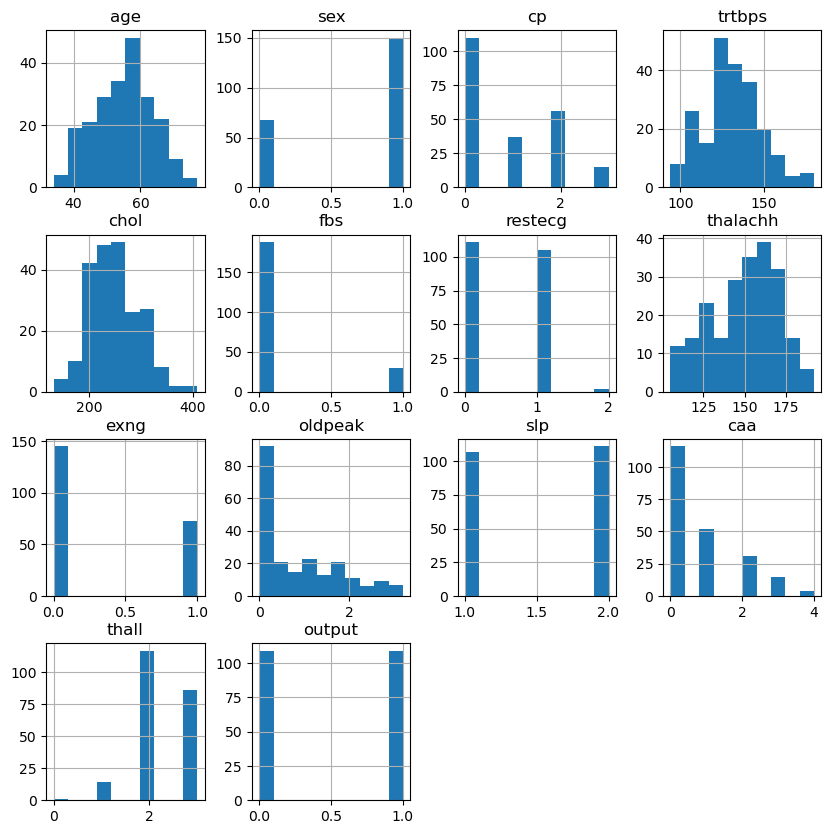

In [90]:
# 각 컬럼의 히스토그램을 전부 출력
under_h_df.hist(figsize=(10, 10))

#### 중간 정리
- 이상치 제거 후 언더 샘플링을 통해 output(target) 데이터 비중의 불균형 해소
- 단, oldpeak feature에서 0 값이 과도하게 많이 발견되어, 이하의 과정으로 해당 현상 해소

In [91]:
oldpeak0 = under_h_df[under_h_df.oldpeak == 0].sample(12, random_state=124)
oldpeak = under_h_df[under_h_df.oldpeak != 0]
under_h_df = pd.concat([oldpeak, oldpeak0]).reset_index(drop=True)
under_h_df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
1,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
2,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
3,52,1,1,134,201,0,1,158,0,0.8,2,1,2,1
4,51,1,2,110,175,0,1,123,0,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
152,41,1,2,112,250,0,1,179,0,0.0,2,0,2,1
153,41,0,2,112,268,0,0,172,1,0.0,2,0,2,1
154,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0


In [12]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

features, targets = heart_df.iloc[:, :-1], heart_df.iloc[:, -1]

# 데이터 세트 분리
X_train, X_test, y_train, y_test = \
                    train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

In [13]:
# SVC 모델용 하이퍼 파라미터 설정
parameters = {
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf']
}

In [14]:
# probability=True를 써야 proba 값을 가져올 수 있다
svc = SVC(probability=True)

# 1. 파이프라인 구축
svc_pipe = Pipeline([('standard_scaler', StandardScaler()), ('svc', svc)])

# 2. GridSearchCV
g_svc = GridSearchCV(svc_pipe, param_grid=parameters, cv=3, refit=True, return_train_score=True)

# 3 모델 훈련
g_svc.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True)

In [15]:
# 각 하이퍼 파라미터 별 평균 평가 점수와, 그에 따른 순위 출력
result_df = pd.DataFrame(g_svc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]

print(result_df['params'][0])
display(result_df)

{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__kernel': 'linear'}


,params,mean_test_score,rank_test_score
0,"{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...",0.543570,45
1,"{'svc__C': 0.001, 'svc__gamma': 0.001, 'svc__k...",0.543570,45
2,"{'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...",0.543570,45
3,"{'svc__C': 0.001, 'svc__gamma': 0.01, 'svc__ke...",0.543570,45
4,"{'svc__C': 0.001, 'svc__gamma': 0.1, 'svc__ker...",0.543570,45
...,...,...,...
67,"{'svc__C': 100, 'svc__gamma': 1, 'svc__kernel'...",0.576852,42
68,"{'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...",0.821553,11
69,"{'svc__C': 100, 'svc__gamma': 10, 'svc__kernel...",0.543570,45
70,"{'svc__C': 100, 'svc__gamma': 100, 'svc__kerne...",0.821553,11


In [16]:
# 순위가 가장 높은 모델들의 하이퍼 파라미터 출력
best_params = result_df[result_df['rank_test_score'] == 1]['params']

best_params

24    {'svc__C': 0.1, 'svc__gamma': 0.001, 'svc__ker...
26    {'svc__C': 0.1, 'svc__gamma': 0.01, 'svc__kern...
28    {'svc__C': 0.1, 'svc__gamma': 0.1, 'svc__kerne...
30    {'svc__C': 0.1, 'svc__gamma': 1, 'svc__kernel'...
32    {'svc__C': 0.1, 'svc__gamma': 10, 'svc__kernel...
34    {'svc__C': 0.1, 'svc__gamma': 100, 'svc__kerne...
61    {'svc__C': 100, 'svc__gamma': 0.001, 'svc__ker...
Name: params, dtype: object

In [17]:
# 위 하이퍼 파라미터들 중 svc__kernel만 출력
for params in best_params:
    kernel = params.get('svc__kernel')
    print(kernel)

linear
linear
linear
linear
linear
linear
rbf


In [18]:
# 가장 높은 점수를 받은 하이퍼 파라미터로 테스트 데이터 예측
svc = g_svc.best_estimator_

prediction = svc.predict(X_test)

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 정밀도, 재현율, F1 score는 다중 분류에서 각각의 확률값의 평균을 구해서 나타내야 한다.
# 이 때, macro 방식과, micro 방식이 대표적이다.
# macro: 평균을 낸 뒤, 그 평균의 다시 평균을 구하는 방식(샘플 수는 신경쓰지 않는다).
# micro: 샘플 수를 전체 합하고 전체 개수도 전체 합해서 나눠주는 방식(샘플 수를 신경쓴다).
# 타겟 데이터의 비중이 많이 차이난다면, micro방식을 사용하는 것이 바람직하다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction, average='micro')
#     재현율
    recall = recall_score(y_test , prediction, average='micro')
#     F1 score
    f1 = f1_score(y_test, prediction, average='micro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[20  8]
 [ 3 30]]
정확도: 0.8197, 정밀도: 0.8197, 재현율: 0.8197, F1: 0.8197
################################################################################


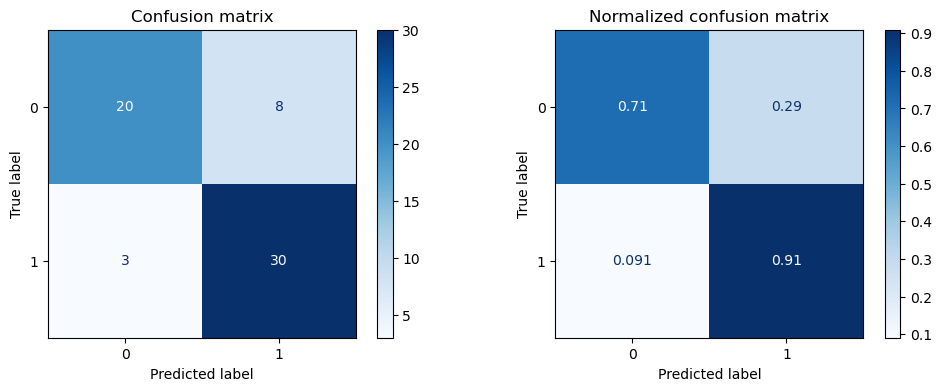

In [20]:
# 모델의 오차행렬 출력 - 평균은 micro 방식으로 산출
get_evaluation(y_test, prediction, svc, X_test)

In [21]:
# proba를 리스트 형태로 출력
svc_pipe.predict_proba(X_test).tolist()

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

#### 결론
- feature 별 데이토 분포를 조정했다면, 다시 표준화 진행 시 패턴의 방향성을 읽게 되어 성능이 더 떨어질 수 있다.
- 결국, 스케일링을 하는 것이 항상 옳은 방식은 아니다.